<a href="https://colab.research.google.com/github/bomiiisong/MachineLearning-with-Python/blob/master/Customer_Satisfaction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Customer Satisfaction (Google Drive Mount)
https://www.kaggle.com/c/santander-customer-satisfaction
<br>
<br>
## Data Information
* Kaggle_Customer_Satisfaction.csv (76,020 * 371)
* TARGET : '0' (만족), '1' (불만)
* Metric : 'F1-Score', pos_label = 1(불만)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'Kaggle_Customer_Satisfaction.zip' 파일을 구글드라이브에 업로드 후 진행

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'

-rw------- 1 root root 4240457 Mar 15 04:04 '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'


# II. Data Preprocessing

> ## 1) Unzip 'Kaggle_Customer_Satisfaction.zip'

* Colab 파일시스템에 'Kaggle_Customer_Satisfaction.csv' 파일 생성

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Kaggle_Customer_Satisfaction.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip
  inflating: Kaggle_Customer_Satisfaction.csv  


* Kaggle_Customer_Satisfaction.csv 파일 확인

In [ ]:
!ls -l

total 57980
drwx------ 5 root root     4096 Mar 20 13:14 drive
-rw-r--r-- 1 root root 59362806 Dec 11  2019 Kaggle_Customer_Satisfaction.csv
drwxr-xr-x 1 root root     4096 Mar 18 13:36 sample_data


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

> ## 2) 데이터 읽어오기

* pandas DataFrame

In [ ]:
import pandas as pd

DF = pd.read_csv('Kaggle_Customer_Satisfaction.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
DF.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


* '0' (만족) TARGET과 '1' (불만) TARGET 개수

In [ ]:
DF.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

* '0' (만족) TARGET과 '1' (불만) TARGET 비율

([<matplotlib.patches.Wedge at 0x7f13f6d28d10>,
 [Text(-1.0915120415667543, 0.13638718090339785, 'satisfaction'),
  Text(1.0915120383743817, -0.13638720645208088, 'non')],
 [Text(-0.5953702044909569, 0.07439300776548974, '96.04%'),
  Text(0.5953702027496627, -0.07439302170113503, '3.96%')])

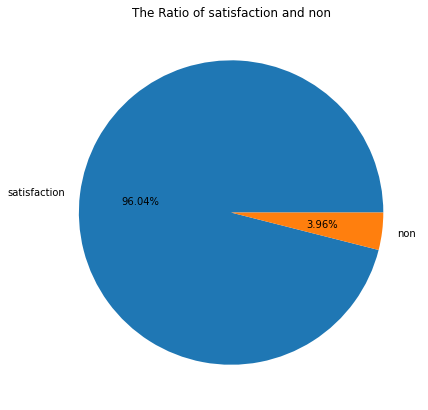

In [ ]:
satis = pd.value_counts(DF["TARGET"]).tolist()
plt.figure(figsize = (8,7))
plt.title("The Ratio of satisfaction and non")
plt.pie(x = satis, labels = ["satisfaction", "non"], autopct='%.2f%%')

In [ ]:
DF.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

* 이상치 '-999999'를 최빈값 '2'로 대체

In [ ]:
DF['var3'].replace(-999999, 2, inplace = True)

* 'ID' 컬럼 삭제

In [ ]:
DF.drop('ID', axis = 1 , inplace = True)

> ## 4) train_test_split

* X (Input), y (Output) 지정

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((76020, 369), (76020,))

> ### (1) Without 'stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [ ]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.081858
1     3.918142
Name: TARGET, dtype: float64
Test_Data : 
 0    95.952819
1     4.047181
Name: TARGET, dtype: float64


> ### (2) With 'Stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [ ]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.042395
1     3.957605
Name: TARGET, dtype: float64
Test_Data : 
 0    96.0449
1     3.9551
Name: TARGET, dtype: float64


# III. EDA

* 변수의 개수가 너무 많아, Tree 모델의 feature importance 먼저 진행

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f = pd.DataFrame(data={'columns':X.columns,'feature_importance':RF.feature_importances_})
f2 = f.sort_values(by='feature_importance',ascending=False).reset_index().drop('index',axis=1)

* 전체 feature importance의 80% 를 차지하는 변수 select => 19개

In [ ]:
feature_sum = 0
feature = []

for idx, v in enumerate(f2['feature_importance']):
    if feature_sum > 0.8:
        break
    else:
        feature_sum += v
        feature.append(f2['columns'][idx])

In [ ]:
print(len(feature))
print(feature_sum)

19
0.8052016225996137


* feature importance > 0.001 이상인 변수 select => 77개 <br>
* feature importance > 0.01 이상인 변수 select => 17개 <br>

In [ ]:
# f3 = f2[f2['feature_importance'] > 0.001]
f3 = f2[f2['feature_importance'] > 0.01]

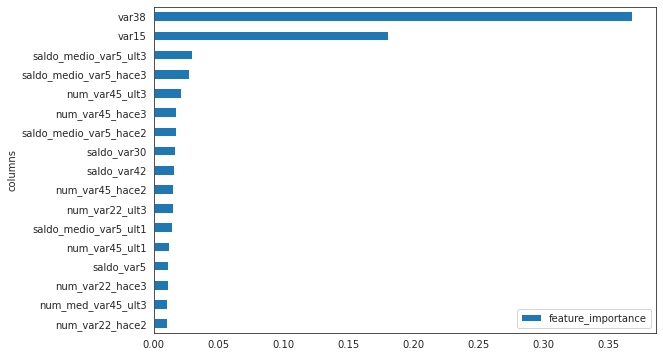

In [ ]:
sns.set_style("white")
ax = f3.plot.barh(x='columns',y='feature_importance',figsize=(9,6))
plt.gca().invert_yaxis()

* select 변수 'cols' 변수에 할당

In [ ]:
cols = list(f3['columns'])
print(len(cols))

17


# IV. Modeling

In [ ]:
def modeling(models, model_name):
    for idx, model in enumerate(models):
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        # 평가
        accuracy = accuracy_score(y_test,pred)
        recall = recall_score(y_test,pred, pos_label=1)
        precision = precision_score(y_test, pred, pos_label=1)
        f1 = f1_score(y_test, pred, pos_label=1)
        name = model_name[idx] + '_' + str(len(X.columns))
        capacity.append((name, accuracy, recall, precision, f1))
    return capacity

> ## 1) No sampling (without SMOTE)

### 1-1. feature selection => 119개

* X, y 정의
* train, test data split

In [ ]:
X = DF[feature]  # 변수 119개
y = DF['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (53214, 119) (53214,)
Test Data :  (22806, 119) (22806,)


* model 정의

In [ ]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
LGB = LGBMClassifier()
XGB = XGBClassifier()

* model 학습 및 성능 추출 (capacity에 저장)

In [ ]:
models = [LR, DT, RF, LGB, XGB]
model_name = ['LR', 'DT', 'RF', 'LGB', 'XGB']
capacity = []
for idx, model in enumerate(models):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    # 평가
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    name = model_name[idx] + '_' + str(len(feature))
    capacity.append((name, accuracy, recall, precision, f1))

* capacity 확인

In [ ]:
capacity

> ## 2) Over Sampling (SMOTE)

### 2-1. feature selection => 119개

* SMOTE 적용 (train data에만 적용)

In [ ]:
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state = 2045)
X_train_OS, y_train_OS = OS.fit_sample(X_train, y_train)

X_train_OS.shape, y_train_OS.shape

((102216, 119), (102216,))

* label 개수 확인

In [ ]:
pd.Series(y_train_OS).value_counts()

1    51108
0    51108
dtype: int64

* SMOTE 적용한 train data => DataFrame으로 변환
* SMOTE 적용하면 numpy array로 데이터 형태 변환됨<br>
    * sklearn package 의 모델들은 array 데이터도 알아서 잘 학습함
    * XGBoost는 sklearn 모델이 아니므로, array 로 변환된 데이터를 test 데이터와 매칭하지 못하여 type error 발생
    * 오류 방지를 위해 앞에서 DataFrame 으로 변경해주기

In [ ]:
DF_OS = pd.DataFrame(X_train_OS, columns=feature)

* Model 학습 및 성능 추출

In [ ]:
for idx, model in enumerate(models):
    model.fit(DF_OS,y_train_OS)
    pred = model.predict(X_test)
    # 평가
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred, pos_label=1)
    precision = precision_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    name = model_name[idx] + '_smote_' + str(len(feature))
    capacity.append((name, accuracy, recall, precision, f1))

In [ ]:
capacity

[('LR_119',
  0.9603613084276068,
  0.0011086474501108647,
  0.25,
  0.002207505518763797),
 ('DT_119',
  0.9303692010874332,
  0.13636363636363635,
  0.13197424892703863,
  0.1341330425299891),
 ('RF_119',
  0.9535648513549067,
  0.04767184035476718,
  0.17695473251028807,
  0.07510917030567686),
 ('LGB_119',
  0.9602297640971674,
  0.0022172949002217295,
  0.2222222222222222,
  0.0043907793633369925),
 ('XGB_119', 0.9604490046478997, 0.0, 0.0, 0.0),
 ('LR_smote_119',
  0.9023941068139963,
  0.15077605321507762,
  0.08521303258145363,
  0.1088871096877502),
 ('DT_smote_119',
  0.91804788213628,
  0.18736141906873613,
  0.12950191570881225,
  0.15314907113729043),
 ('RF_smote_119',
  0.942076646496536,
  0.13082039911308205,
  0.1801526717557252,
  0.15157353885677588),
 ('LGB_smote_119',
  0.9394019117776023,
  0.2106430155210643,
  0.22093023255813954,
  0.21566401816118047),
 ('XGB_smote_119',
  0.8980531439094975,
  0.43902439024390244,
  0.17878103837471784,
  0.25409047160731474)

> ## 3) Under Sampling

* 불만(1) 데이터 개수에 맞춰 데이터 균형 맞추기 

* label 이 불만(1) 인 데이터 개수 확인

In [ ]:
y.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

* train, test 로 나눈 뒤, train 데이터만 under sampling
* under sampling 위해 X_train data 와 y_train data 결합 

In [ ]:
X_train['TARGET'] = y_train
X_train

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
32918,2,35,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48003.06,0.0,51313.62,49658.34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99129.060000,0
34046,2,25,0.0,231.12,697.05,0.0,0.0,0.0,0.0,0.0,231.12,697.05,60.0,420.0,291.12,60.0,420.0,291.12,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100.74,102.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134512.950000,0
25864,2,53,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149159.310000,0
43104,2,45,1050.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,185.91,329.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
43583,2,45,0.0,8.82,8.82,0.0,0.0,0.0,0.0,0.0,8.82,8.82,0.0,0.0,8.82,0.0,0.0,8.82,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30.39,26.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65373.570000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21503,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93025.380000,0
4982,2,32,1950.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,150.0,150.0,150.00,150.0,150.0,150.00,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4218.15,4123.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,

* Under Sampling 과정

In [ ]:
satisfaction = X_train[X_train['TARGET'] == 0].index # label 만족인 데이터 인덱스 추출
non = X_train[X_train['TARGET'] == 1].index          # label 불만족인 데이터 인덱스 추출

number_of_non = len(non)    # 불만 데이터 총 개수 저장

random_satisfaction = np.random.choice(satisfaction, number_of_non)  # 만족 데이터 인덱스에서 불만 데이터 개수만큼 랜덤 추출 (2106개)

under_sample = np.concatenate([non, random_satisfaction])  # 불만 데이터 인덱스와 랜덤으로 뽑은 만족 데이터 결합 (4212개) => 균형화

data_undersample = X_train.loc[under_sample, :]  # 기존 데이터에서 균형화한 데이터 개수만큼 추출(행 추출)

In [ ]:
data_undersample.shape

(4212, 370)

* Under Sampling 데이터로 X, y 정의

In [ ]:
X_undersample = data_undersample[feature]
y_undersample = data_undersample['TARGET']

print(X_undersample.shape, y_undersample.shape)

(4212, 19) (4212,)


In [ ]:
X_test = X_test[feature]
print(X_test.shape)

(22806, 19)


In [ ]:
models = [LR, DT, RF, LGB, XGB]
model_name = ['LR', 'DT', 'RF', 'LGB', 'XGB']
capacity = []
for idx, model in enumerate(models):
    model.fit(X_undersample, y_undersample)
    pred = model.predict(X_test)
    # 평가
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test, pred, pos_label=1)
    precision = precision_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    name = model_name[idx] + '_undersample_' + str(len(feature))
    capacity.append((name, accuracy, recall, precision, f1))

In [ ]:
capacity

[('LR_undersample_19',
  0.6041392615978252,
  0.6807095343680709,
  0.06564036775710926,
  0.11973478939157566),
 ('DT_undersample_19',
  0.6652635271419802,
  0.6718403547671841,
  0.07628398791540786,
  0.13701107845353833),
 ('RF_undersample_19',
  0.7296764009471192,
  0.7450110864745011,
  0.10171030724988649,
  0.17898521773871354),
 ('LGB_undersample_19',
  0.742348504779444,
  0.7716186252771619,
  0.10933081998114987,
  0.1915244909190974),
 ('XGB_undersample_19',
  0.7525651144435674,
  0.7893569844789357,
  0.11549067315490673,
  0.20149992924862037)]

* under sampling + feature 77

In [ ]:
X_undersample = data_undersample[cols]
y_undersample = data_undersample['TARGET']

print(X_undersample.shape, y_undersample.shape)

(4212, 77) (4212,)


In [ ]:
X_test = X_test[cols]
print(X_test.shape)

(22806, 77)


In [ ]:
for idx, model in enumerate(models):
    model.fit(X_undersample, y_undersample)
    pred = model.predict(X_test)
    # 평가
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test, pred, pos_label=1)
    precision = precision_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    name = model_name[idx] + '_under_' + str(len(cols))
    capacity.append((name, accuracy, recall, precision, f1))

In [ ]:
capacity

* under sampling + feature 17

In [ ]:
X_undersample = data_undersample[cols]
y_undersample = data_undersample['TARGET']

print(X_undersample.shape, y_undersample.shape)

(4212, 17) (4212,)


In [ ]:
X_test_17 = X_test[cols]
print(X_test.shape)

(22806, 17)


In [ ]:
for idx, model in enumerate(models):
    model.fit(X_undersample, y_undersample)
    pred = model.predict(X_test_17)
    # 평가
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test, pred, pos_label=1)
    precision = precision_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    name = model_name[idx] + '_under_' + str(len(cols))
    capacity.append((name, accuracy, recall, precision, f1))

In [ ]:
capacity

[('LR_undersample_19',
  0.6041392615978252,
  0.6807095343680709,
  0.06564036775710926,
  0.11973478939157566),
 ('DT_undersample_19',
  0.6652635271419802,
  0.6718403547671841,
  0.07628398791540786,
  0.13701107845353833),
 ('RF_undersample_19',
  0.7296764009471192,
  0.7450110864745011,
  0.10171030724988649,
  0.17898521773871354),
 ('LGB_undersample_19',
  0.742348504779444,
  0.7716186252771619,
  0.10933081998114987,
  0.1915244909190974),
 ('XGB_undersample_19',
  0.7525651144435674,
  0.7893569844789357,
  0.11549067315490673,
  0.20149992924862037),
 ('LR_under_77',
  0.7648864333947207,
  0.4490022172949002,
  0.07685009487666034,
  0.13123784834737523),
 ('DT_under_77',
  0.6694290976058932,
  0.6873614190687362,
  0.07871016884600736,
  0.14124615559858753),
 ('RF_under_77',
  0.7416469350171008,
  0.7172949002217295,
  0.10295989815404201,
  0.18007236292791537),
 ('LGB_under_77',
  0.749802683504341,
  0.7649667405764967,
  0.11157826649417853,
  0.1947502116850127),

In [ ]:
confusion_matrix(y_test, pred)

array([[16380,  5524],
       [  189,   713]])

## Model Tuning

In [ ]:
rf_params={'max_depth':[3,10,20],
            'n_estimators':[100,1000,2000]           
}

xgb_params = {
        'n_estimators':[100,1000,2000],
        'learning_rate': [0.1, 0.3, 0.5],
        'max_depth': [3, 10, 20]
        }

lgb_params={
    'boosting_type':['gbdt','goss','dart'],
    'objective':['binary'],
    'is_unbalance':[True,False],
    'learning_rate':[0.005,0.01,0.05,0.1],
    'max_depth':[3,10,20],
    'min_gain_to_split':[2,5,10,15,100],
    'n_estimators':[100,1000,2000]
}

In [ ]:
# rf_cv = GridSearchCV(RF, param_grid=rf_params, scoring='f1',
#                        cv=KFold(n_splits=5, random_state=2045),
#                        refit=True, n_jobs=-1)

xgb_cv = GridSearchCV(XGB, param_grid=xgb_params, scoring='f1',
                       cv=KFold(n_splits=5, random_state=77),
                       refit=True, n_jobs=-1)

lgb_cv = GridSearchCV(LGB, param_grid=lgb_params, scoring='f1',
                       cv=KFold(n_splits=5, random_state=77),
                       refit=True, n_jobs=-1)

In [ ]:
xgb_cv.fit(X_train_under, y_train_under)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 10, 20],
        

In [ ]:
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

0.7382681250140632
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [ ]:
XGB_cv = xgb_cv.best_estimator_

pred = XGB_cv.predict(X_test_under)
# 평가
accuracy = accuracy_score(y_test_under,pred)
recall = recall_score(y_test_under, pred, pos_label=1)
precision = precision_score(y_test_under, pred, pos_label=1)
f1 = f1_score(y_test_under, pred, pos_label=1)
name = 'xgb_cv_' + str(len(cols))
capacity.append((name, accuracy, recall, precision, f1))

In [ ]:
capacity

In [ ]:
confusion_matrix(y_test_under, pred)

array([[672, 211],
       [245, 677]])

* LGBM Search parameter

In [ ]:
lgb_cv.fit(X_train_under, y_train_under)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_stat...
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'goss', 'dart'],
                         'is_unbalance': [True, False],
                         'learning_rate': [0.005, 0.01, 0.05, 0.1],
        

In [ ]:
print(lgb_cv.best_score_)
print(lgb_cv.best_params_)

NameError: ignored

In [ ]:
result = pd.DataFrame(data=capacity, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1'])
result.sort_values(by='F1', ascending=False, inplace=False)

,Model,Accuracy,Recall,Precision,F1
18,LGB_under_80,0.768421,0.760304,0.780624,0.770330
24,XGB_under_16,0.766759,0.758134,0.779264,0.768554
19,XGB_under_80,0.766205,0.759219,0.777778,0.768386
14,XGB_under_119,0.765097,0.758134,0.776667,0.767289
13,LGB_under_119,0.763989,0.755965,0.776169,0.765934
23,LGB_under_16,0.759003,0.744035,0.775141,0.759270
25,xgb_cv_16,0.747368,0.734273,0.762387,0.748066
17,RF_under_80,0.746260,0.727766,0.764237,0.745556
12,RF_under_119,0.736842,0.709328,0.759582,0.733595
22,RF_under_16,0.737396,0.695228,0.768585,0.730068


Text(0, 0.5, 'f1_score')

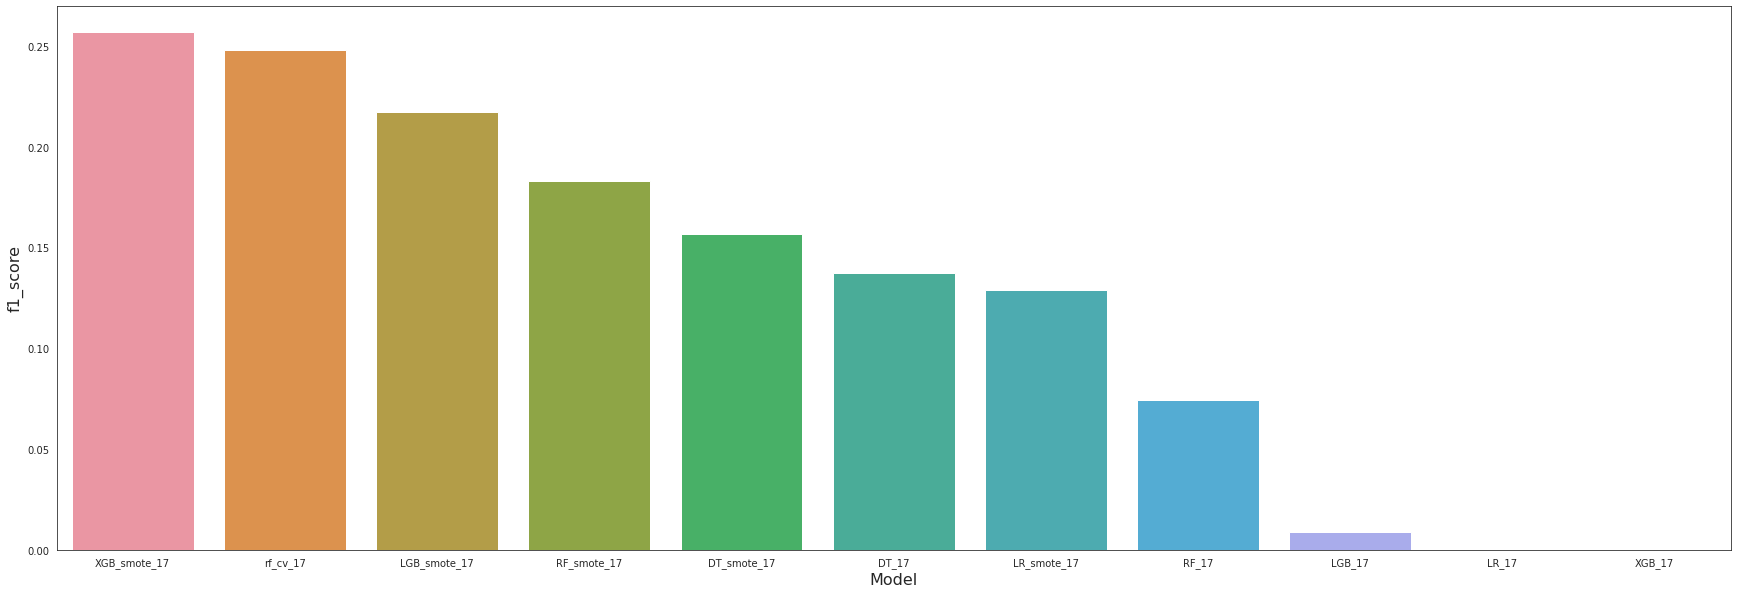

In [ ]:
f, axe = plt.subplots(1,1, figsize=(30,10))
sns.barplot(x='Model', y='f1_score', data=Final, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('f1_score', size=16)

# V. 최종 정리

1. Over Sampling vs Under Sampling <br>
    * Over Sampling <br>
        * Recall, F1 score 모두 매우 낮음
        * 데이터의 90% 를 만족(y==1)로 분류하는 듯
    * Under Sampling <br>
        * Recall, F1 score 모두 안정적으로 향상됨 - 76% 정도
        * 더 높이기 위해서 데이터 전처리 or 모델 파라미터 조정 필요

2. 변수 선택 <br>
    * Over Sampling 당시 중요도 높은 변수 상위 17개만 사용 (feature importance > 0.0001)
    * 변수가 적어서 성능에 차이가 있을 것이라고 예상 -> 변수 새로 추출
    * case 1) feature importance 합이 80% 인 변수들 선택 -> 119개
    * case 2) feature importance > 0.001 인 변수 선택 -> 80개
    * case 3) feature importance > 0.01 인 변수 선택 -> 16개
    * 3가지 case 로 성능 비교한 결과, 16개의 변수만으로도 비슷한 성능을 보임

3. Question Potint <br>
    * Under Sampling 으로 모델을 생성한 후에, 모델을 사용하려면 데이터의 Under Sampling이 필수적으로 수반되는가?
    * Over Sampling 은 train data 에만 적용하고 test data 에는 적용하지 않는데, Under Sampling 의 경우에는 어떻게 해야하는가?
    * 전처리에 추가할 수 있는 방법은?
    * Deep Learning 모델로 학습하면 성능이 어느정도 나올까?



---



# 
# 
# 
# The End
# 
# 
# 